In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualizing data
import seaborn as sns 
from collections import Counter
%matplotlib inline
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import os


In [2]:
df = df= pd.read_csv('BlackFriday.csv')

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
df.shape


(537577, 12)

In [5]:
df.User_ID.nunique()

5891

In [6]:
df.Product_ID.nunique() 

3623

In [7]:
df.Purchase.describe()

count    537577.000000
mean       9333.859853
std        4981.022133
min         185.000000
25%        5866.000000
50%        8062.000000
75%       12073.000000
max       23961.000000
Name: Purchase, dtype: float64

In [8]:
df[df['Product_ID']=='P00000142']

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
293,1000049,P00000142,M,18-25,12,C,4+,1,3,4.0,5.0,13353
1066,1000181,P00000142,M,18-25,17,C,1,0,3,4.0,5.0,5396
1073,1000182,P00000142,M,18-25,4,C,0,0,3,4.0,5.0,13301
1322,1000215,P00000142,M,36-45,14,C,1,1,3,4.0,5.0,10620
1910,1000306,P00000142,M,18-25,0,C,3,0,3,4.0,5.0,8297
2805,1000453,P00000142,M,18-25,4,B,1,0,3,4.0,5.0,8276
3014,1000490,P00000142,M,0-17,10,B,1,0,3,4.0,5.0,10868
3551,1000574,P00000142,M,26-35,19,C,4+,1,3,4.0,5.0,10954
3742,1000613,P00000142,M,36-45,20,C,1,1,3,4.0,5.0,13610
5226,1000855,P00000142,F,18-25,2,A,2,1,3,4.0,5.0,10783


In [9]:
# creating features with mean of the price of prodcuts customers paid
mean=df.groupby('Product_ID')['Purchase'].mean()
mean=pd.DataFrame(data=mean).reset_index()
df=pd.merge(df,mean, on='Product_ID') # merging the column with the original df
df=df.rename( columns={"Purchase_x": "Purchase_price","Purchase_y": "Mean_Purchase_price"})

In [10]:
# creating features with min  of the price of prodcuts customers paid
minp=df.groupby('Product_ID')['Purchase_price'].min()
minp=pd.DataFrame(data=minp).reset_index()
df=pd.merge(df,minp, on='Product_ID')  
df=df.rename( columns={"Purchase_price_y": "Min_purchase_price", "Purchase_price_x": "Purchase"})

In [11]:
#creating features with max  of the price of prodcuts customers paid
maxp=df.groupby('Product_ID')['Purchase'].max()
maxp=pd.DataFrame(data=maxp).reset_index()
df=pd.merge(df,maxp, on='Product_ID')
df=df.rename( columns={"Purchase_x": "Purchase","Purchase_y": "Max_purchase_price"})

In [12]:
# to see what percent of discount is applied to the items 
df['Discount']=100- ((df.Purchase /df.Max_purchase_price) *100)

In [13]:
df.Discount.describe()

count    537577.000000
mean         28.871566
std          21.412178
min           0.000000
25%          19.339120
50%          22.137960
75%          40.867221
max          80.769231
Name: Discount, dtype: float64

Text(0.5,1,'Histogram showing discount percentages')

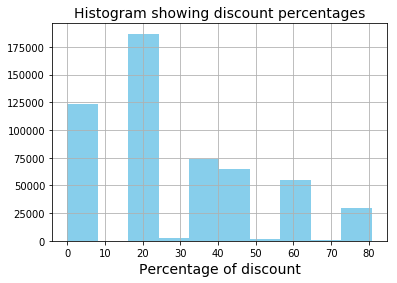

In [14]:
df.Discount.hist(color='skyblue')
plt.xlabel('Percentage of discount', fontsize=14)
plt.title('Histogram showing discount percentages', fontsize=14)

In [15]:
df.Gender.value_counts(normalize=True)

M    0.754087
F    0.245913
Name: Gender, dtype: float64

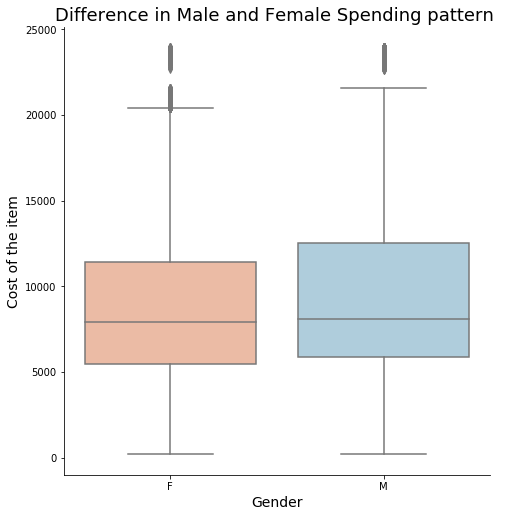

In [17]:
sns.catplot(x="Gender", y="Purchase",kind="box",data=df, palette="RdBu", height=7)
plt.title('Difference in Male and Female Spending pattern ', fontsize=18)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Cost of the item', fontsize=14)
plt.show()

In [18]:
#propotion of gender who buy expensive items (<75% of purchase price)
df[df['Purchase']>12054]['Gender'].value_counts(normalize=True)

M    0.797682
F    0.202318
Name: Gender, dtype: float64

In [19]:
x=df.Occupation.value_counts(normalize=True)

In [20]:
# grouping occupations that were o less than 2 percent of the occupations
b = x[x >0.02]
b['rest'] = x[x <= 0.02].sum()

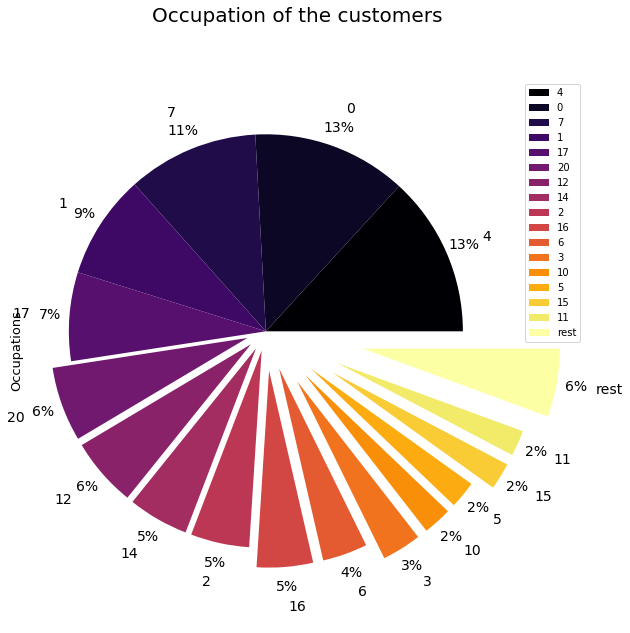

In [36]:
#plot to show different types of occupations
explode = (0,0,0,0,0,0.1, 0.1,0.1,0.1,0.2, 0.2,  0.3,0.3,0.3,0.4,0.4,0.5)
b.plot(kind='pie', fontsize=14, colormap='inferno', explode=explode, figsize=(10,10),
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt.axis('equal')
plt.suptitle('Occupation of the customers', fontsize=20)
plt.ylabel('Occupations', fontsize=13)
plt.legend(labels=b.index, loc="upper right")
plt.show()

In [22]:
df.City_Category.value_counts(normalize=True)

B    0.421322
C    0.309623
A    0.269055
Name: City_Category, dtype: float64

Text(-8.825,0.5,'Cost of the item')

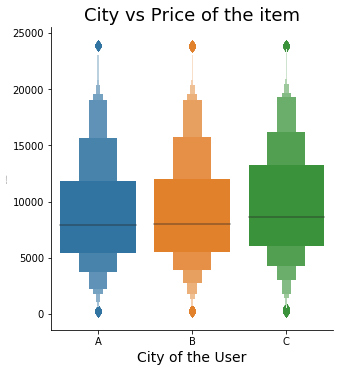

In [23]:
sns.catplot(y='Purchase', x='City_Category', data=df, kind="boxen")
plt.title('City vs Price of the item', fontsize=18)
plt.xlabel('City of the User', fontsize=14)
plt.ylabel('Cost of the item', fontsize=1)

In [24]:
df.Stay_In_Current_City_Years.value_counts(normalize=True)

1     0.351935
2     0.185013
3     0.173579
4+    0.154190
0     0.135283
Name: Stay_In_Current_City_Years, dtype: float64

In [25]:
df.Marital_Status.value_counts(normalize=True)

0    0.591203
1    0.408797
Name: Marital_Status, dtype: float64

In [26]:
df.Age.value_counts(normalize=True)

26-35    0.399366
36-45    0.199969
18-25    0.181619
46-50    0.082827
51-55    0.069977
55+      0.038884
0-17     0.027358
Name: Age, dtype: float64

Text(-8.825,0.5,'Cost of the item')

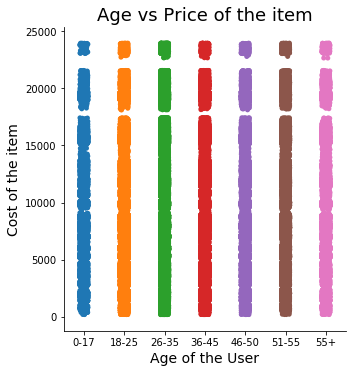

In [28]:
sns.catplot(y='Purchase', x='Age', data=df, kind="strip",order=['0-17','18-25','26-35','36-45','46-50','51-55','55+'])

plt.title('Age vs Price of the item', fontsize=18)
plt.xlabel('Age of the User', fontsize=14)
plt.ylabel('Cost of the item', fontsize=14)

In [29]:
x=df.Product_Category_1.value_counts(normalize=True)


In [31]:
value = x[x >0.02]
value['rest'] = x[x <= 0.02].sum()


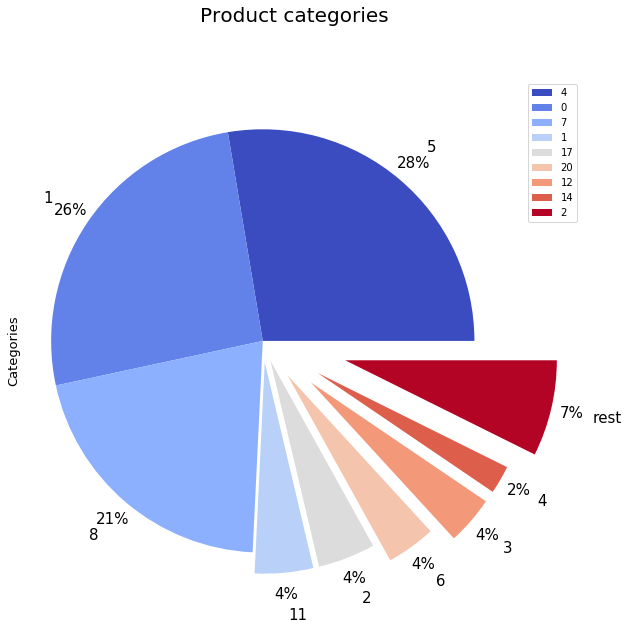

In [34]:
explode = (0,0,0,0.1, 0.1,0.2,0.3,0.3, 0.4)
value.plot(kind='pie', fontsize=15, colormap='coolwarm', explode=explode, figsize=(10,10),
       autopct='%1.0f%%',pctdistance=1.1, labeldistance=1.2)
plt.axis('equal')
plt.suptitle('Product categories', fontsize=20)
plt.ylabel('Categories', fontsize=13)
plt.legend(labels=b.index, loc="upper right")
plt.show()


In [37]:
#dummyfying the product categories to see most correlated categories
prdt=pd.get_dummies(df['Product_Category_1'], columns=['Product_Category_1'])

In [38]:
prdt.corr().abs().unstack().sort_values().drop_duplicates().nlargest(10)

1  1     1.000000
5  1     0.363846
   8     0.317303
8  1     0.302224
5  11    0.133492
2  5     0.132142
1  11    0.127148
2  1     0.125862
5  6     0.122012
3  5     0.121018
dtype: float64

In [39]:
#amount spent in the store by each user to identify high spenders
amount=df.groupby('User_ID')['Purchase'].sum()
amount=pd.DataFrame(data=amount).reset_index() 
df=pd.merge(df,amount, on ='User_ID')
df=df.rename( columns={"Purchase_y": "Amount_user_spent", "User_ID_x":"User_ID"})

In [40]:
df.Amount_user_spent.describe()

count    5.375770e+05
mean     1.911849e+06
std      1.483774e+06
min      4.410800e+04
25%      7.831780e+05
50%      1.562615e+06
75%      2.668388e+06
max      1.053678e+07
Name: Amount_user_spent, dtype: float64

In [41]:
#identifying top 10 spenders
df.sort_values('Amount_user_spent', ascending= False).head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_x,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Discount,Amount_user_spent
41492,1004277,P00183842,M,36-45,16,A,0,0,4,9.0,12.0,2853,2166.954545,753,3528,19.132653,10536783
41165,1004277,P00038342,M,36-45,16,A,0,0,2,4.0,NaN,12829,9602.307692,3283,16477,22.139953,10536783
41163,1004277,P00089242,M,36-45,16,A,0,0,2,5.0,NaN,9881,11636.413793,3308,16485,40.060661,10536783
41162,1004277,P00049442,M,36-45,16,A,0,0,1,8.0,NaN,15296,13417.544379,3887,19658,22.189439,10536783
41161,1004277,P00244042,M,36-45,16,A,0,0,1,2.0,15.0,15459,12176.636957,3799,19706,21.551812,10536783
41160,1004277,P00324942,M,36-45,16,A,0,0,5,NaN,NaN,7135,6811.744516,1741,8907,19.894465,10536783
41159,1004277,P00277542,M,36-45,16,A,0,0,1,6.0,15.0,12123,9173.669118,3822,19469,37.731779,10536783
41158,1004277,P00117742,M,36-45,16,A,0,0,8,NaN,NaN,8126,6976.962264,1994,10079,19.376922,10536783
41157,1004277,P00127342,M,36-45,16,A,0,0,1,2.0,15.0,15490,12288.364269,3805,19695,21.350597,10536783
41156,1004277,P00367242,M,36-45,16,A,0,0,11,NaN,NaN,4645,4162.238636,1495,7629,39.113907,10536783


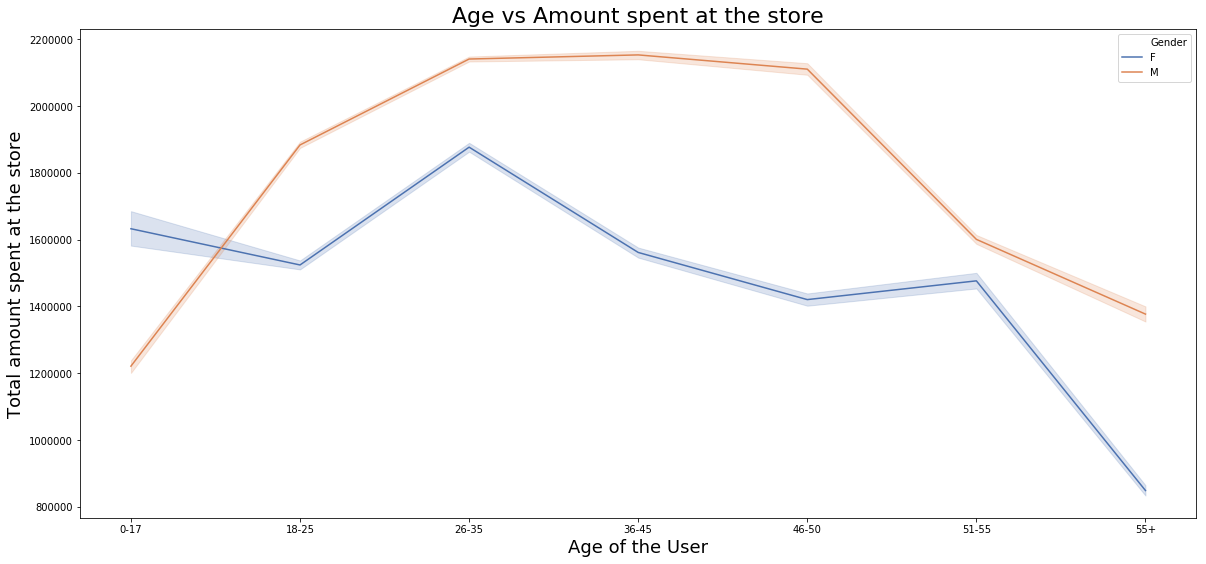

In [42]:
#plot to see how age affects the overall  spending of the user
plt.subplots(figsize=(20,9))
sns.lineplot(x='Age',y='Amount_user_spent',hue='Gender', data=df, palette='deep')

plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=14
plt.title('Age vs Amount spent at the store', fontsize=22)
plt.xlabel('Age of the User', fontsize=18)
plt.ylabel('Total amount spent at the store', fontsize=18);

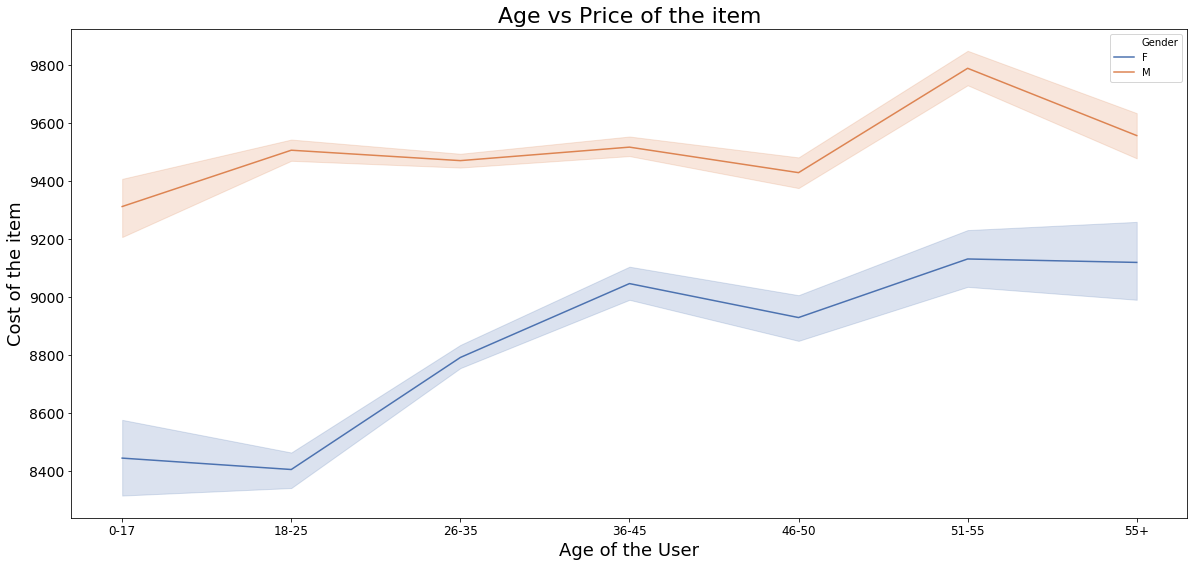

In [43]:
#plot to see how age and gender affects the price of the item they buy
plt.subplots(figsize=(20,9))
sns.lineplot(x='Age',y='Purchase_x',hue='Gender', data=df, palette='deep')


plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=14
plt.title('Age vs Price of the item', fontsize=22)
plt.xlabel('Age of the User', fontsize=18)
plt.ylabel('Cost of the item', fontsize=18);

In [44]:
num=df.groupby('User_ID')['Product_ID'].count() #grouping by user id to count number of items each user bought 
numprod=pd.DataFrame(data=num).reset_index()
df=pd.merge(df,numprod, on='User_ID')
df=df.rename( columns={"Product_ID_x":"Product_ID","Product_ID_y": "User_prod_bought"})

In [45]:
df.User_prod_bought.describe(percentiles=(0.25,0.50,.75,0.9,0.95))


count    537577.000000
mean        214.198961
std         174.138277
min           5.000000
25%          80.000000
50%         168.000000
75%         299.000000
90%         454.000000
95%         557.000000
max        1025.000000
Name: User_prod_bought, dtype: float64

Text(0.5,0,'Items bought')

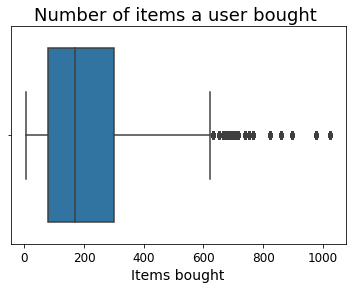

In [46]:
sns.boxplot(x=df["User_prod_bought"])
plt.title('Number of items a user bought ', fontsize=18)
plt.xlabel('Items bought', fontsize=14)

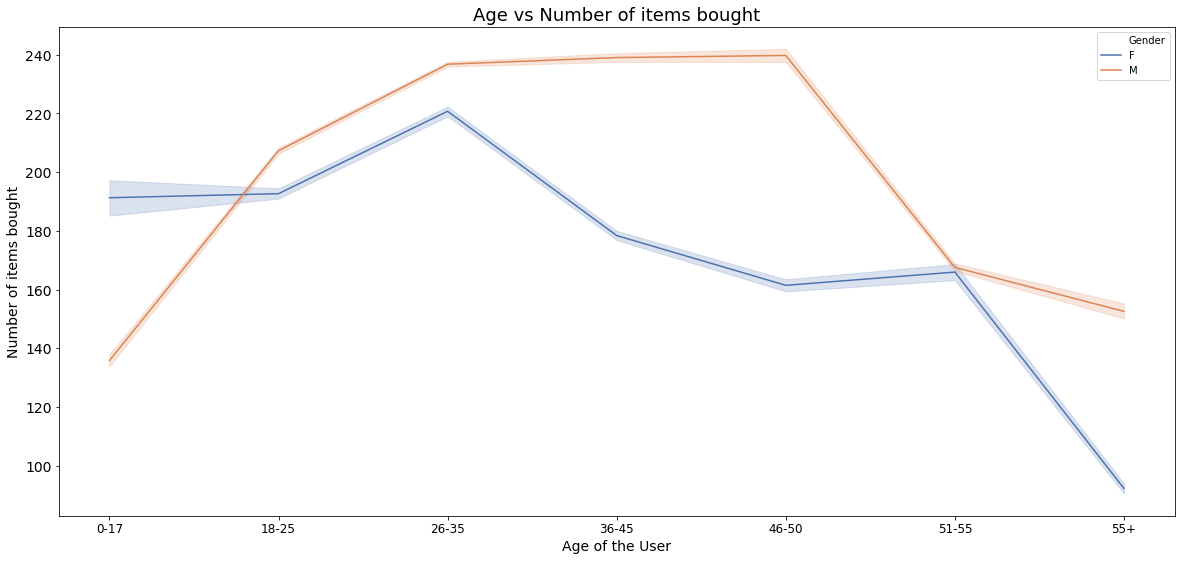

In [47]:
#plot to see how age and gender affects the number of the items they buy
plt.subplots(figsize=(20,9))
sns.lineplot(x='Age',y='User_prod_bought',hue='Gender', data=df, palette='deep')
plt.rcParams['xtick.labelsize']=12
plt.rcParams['ytick.labelsize']=14
plt.title('Age vs Number of items bought', fontsize=18)
plt.xlabel('Age of the User', fontsize=14)
plt.ylabel('Number of items bought', fontsize=14);

In [48]:
#number of products of each type that were sold in total
prdtcnt=df.groupby('Product_ID')['User_ID'].count()
prdtcnt=pd.DataFrame(data=prdtcnt).reset_index()
df=pd.merge(df,prdtcnt, on ='Product_ID')
df=df.rename( columns={"User_ID_y": "Quantity_sold"})

In [49]:
df.Quantity_sold.describe()


count    537577.000000
mean        440.371759
std         357.337756
min           1.000000
25%         170.000000
50%         348.000000
75%         602.000000
max        1858.000000
Name: Quantity_sold, dtype: float64

Text(0.5,0,'Quantity')

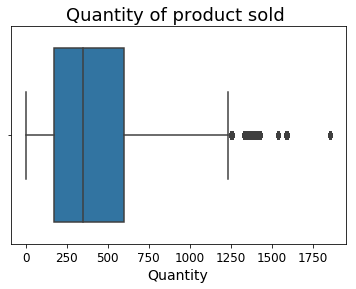

In [50]:
sns.boxplot(x=df["Quantity_sold"])
plt.title('Quantity of product sold ', fontsize=18)
plt.xlabel('Quantity', fontsize=14)

In [51]:
df[df['Quantity_sold']==1]['Product_ID'].nunique()


141

In [52]:
df[df['Discount']==0]['Purchase_x'].min() #min price of low quantity product


405

In [53]:
df[df['Discount']==0]['Purchase_x'].max() #max price of low quantity product


23961

In [54]:
df[df['Quantity_sold']>620]['Product_ID'].nunique()


142

In [55]:
def popularItem(column):

    if column>620:
        return 1
    else:
        return 0
    
df['Popular']=df['Quantity_sold'].apply(popularItem)

In [56]:
df.corr()


,User_ID_x,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase_x,Mean_Purchase_price,Min_purchase_price,Max_purchase_price,Discount,Amount_user_spent,User_prod_bought,Quantity_sold,Popular
User_ID_x,1.000000,-0.023024,0.018732,0.003687,0.001471,0.004045,0.005389,0.005765,0.002331,0.000672,-0.007457,-0.050346,-0.054071,0.002875,0.003175
Occupation,-0.023024,1.000000,0.024691,-0.008114,-0.000031,0.013452,0.021104,0.021130,0.019949,0.020295,-0.006182,0.008093,0.001736,0.011245,0.009896
Marital_Status,0.018732,0.024691,1.000000,0.020546,0.015116,0.019452,0.000129,0.004170,0.006218,-0.007059,-0.010721,-0.008167,-0.004037,-0.010761,-0.006513
Product_Category_1,0.003687,-0.008114,0.020546,1.000000,0.540423,0.229490,-0.314125,-0.371471,-0.330608,-0.439066,-0.044098,0.024524,0.039240,-0.248547,-0.174323
Product_Category_2,0.001471,-0.000031,0.015116,0.540423,1.000000,0.543544,-0.209973,-0.251298,-0.254645,-0.297950,-0.035036,0.007915,0.013053,-0.134684,-0.074027
Product_Category_3,0.004045,0.013452,0.019452,0.229490,0.543544,1.000000,-0.022257,-0.028831,-0.029817,-0.035521,-0.000324,0.011973,0.007478,-0.059374,-0.091500
Purchase_x,0.005389,0.021104,0.000129,-0.314125,-0.209973,-0.022257,1.000000,0.845625,0.724093,0.792225,-0.567785,-0.048341,-0.100825,0.328692,0.255067
Mean_Purchase_price,0.005765,0.021130,0.004170,-0.371471,-0.251298,-0.028831,0.845625,1.000000,0.856282,0.936851,-0.158836,-0.063483,-0.090135,0.388697,0.301632
Min_purchase_price,0.002331,0.019949,0.006218,-0.330608,-0.254645,-0.029817,0.724093,0.856282,1.000000,0.887861,-0.037267,0.002879,-0.019933,0.115985,0.090686
Max_purchase_price,0.000672,0.020295,-0.007059,-0.439066,-0.297950,-0.035521,0.792225,0.936851,0.887861,1.000000,-0.007813,-0.016191,-0.043100,0.230050,0.165525
